# 1章 データの整理とベイズの定理

In [63]:
import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt

1.7 演習問題

In [41]:
data = [
    36, 38, 51, 40, 41, 52, 43, 31, 35, 37, 49, 43, 43, 41, 36, 53, 43, 26, 45, 37, 33, 38,
    33, 35, 36, 28, 46, 41, 32, 49, 43, 38, 46, 46, 46, 45, 44, 40, 38, 37, 35, 39, 31, 55,
    48, 32, 37, 37, 45, 39, 42, 40, 40, 50, 38, 51, 29, 44, 41, 42, 43, 36, 38, 33, 32, 42,
    43, 40, 46, 54, 37, 24, 47, 35, 35, 47, 38, 31, 41, 39, 40, 43, 37, 45, 38, 42, 48, 43,
    38, 48, 47, 44, 42, 36, 50, 36, 55, 51, 38, 33]
df = pd.DataFrame({'score': data})

# 1) 度数分布
value_counts = df['score'].value_counts(bins=range(20, 60 + 5, 5))
print(value_counts)

(35.0, 40.0]      32
(40.0, 45.0]      26
(45.0, 50.0]      15
(30.0, 35.0]      15
(50.0, 55.0]       8
(25.0, 30.0]       3
(19.999, 25.0]     1
(55.0, 60.0]       0
Name: score, dtype: int64


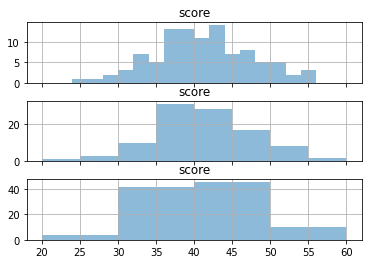

In [42]:
# 2) ヒストグラム

binwidth_list = [2, 5, 10]
fig, ax = plt.subplots(nrows = len(binwidth_list))
for idx, binwidth in enumerate(binwidth_list):
    bins = range(20, 60 + binwidth, binwidth)
    df.hist(alpha=0.5, bins=bins, ax=ax[idx])

In [45]:
# 3) 標本平均, 標本分散, 標本標準偏差

stats_vals = {
    'mean': np.mean(df['score']),
    'var': np.var(df['score']),
    'std': np.std(df['score'])}
print(stats_vals)

{'mean': 40.64, 'var': 40.9104, 'std': 6.396123826193486}


In [61]:
# 4) ソート・最大値・最小値

sorted_vals = {
    'ascending_head': sorted(df['score'])[:5],
    'decending_head': sorted(df['score'])[::-1][:5],
    'max': max(df['score']),
    'min': min(df['score'])}
print(sorted_vals)

{'ascending_head': [24, 26, 28, 29, 31], 'decending_head': [55, 55, 54, 53, 52], 'max': 55, 'min': 24}


In [74]:
# 5) 中央値・最頻値

stats_vals = {
    'median': np.median(df['score']),
    'mode': df['score'].value_counts().keys()[0]
}
print(stats_vals)

{'median': 40.0, 'mode': 38}


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fea5fd02c50>],
      dtype=object)

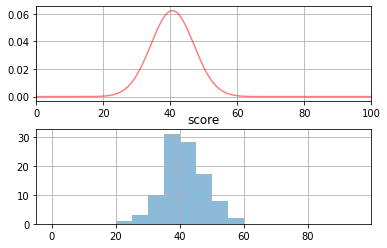

In [95]:
# 6) 標本平均・標本標準偏差を正規分布の母数として確率分布を見る

x = np.arange(0,100,0.01)
y = stats.norm.pdf(x, np.mean(df['score']), np.std(df['score']))

fig, ax = plt.subplots(nrows = 2)

# 正規分布のプロット
ax[0].plot(x,y, color='r', alpha=0.5)
ax[0].set_xlim(0,100)
ax[0].grid()

# 標本のヒストグラム
bins = range(0, 100, 5)
df.hist(alpha=0.5, bins=bins, ax=ax[1])

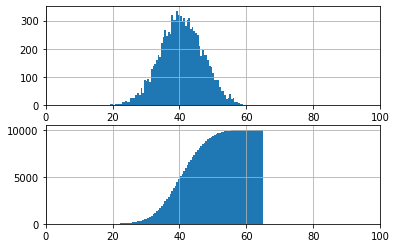

In [106]:
samples = np.random.normal(np.mean(df['score']), np.std(df['score']), 10000)

fig, ax = plt.subplots(nrows = 2)
ax[0].hist(samples, bins=100)
ax[0].set_xlim(0,100)
ax[0].grid()

ax[1].hist(samples, cumulative=True, bins=100)
ax[1].set_xlim(0,100)
ax[1].grid()